In [73]:
%matplotlib inline
#%matplotlib notebook

import matplotlib.pyplot as plt

plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['figure.figsize'] = 12,8

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy.ma as ma
from scipy.optimize import curve_fit
from pprint import pprint

In [38]:
def get_data(file_name):
    data = np.genfromtxt(file_name, dtype=float, delimiter=None,
                         skip_header=2, names=["Qx", "Qy", "I(Qx,Qy)", "err(I)"])
    shape_x = len(np.unique(data['Qx']))
    shape_y = len(np.unique(data['Qy']))
    data_x = data['Qx']  # .reshape(shape_x, shape_y)
    data_y = data['Qy']  # .reshape(shape_x, shape_y)
    data_z = data['IQxQy']  # .reshape(shape_x, shape_y)
    return data_x, data_y, data_z

In [39]:
filename = "./Bio-SANS/anisotropy_shoulder_streak-like-scattering-no-peak/high-q_has_shoulder/BioSANS_exp317_scan0064_0001_Iqxy.dat"
data_x, data_y, data_z = get_data(filename)

# Raw image
shape_x = len(np.unique(data_x))
shape_y = len(np.unique(data_y))
X = data_x.reshape(shape_x, shape_y)
Y = data_y.reshape(shape_x, shape_y)
Z = data_z.reshape(shape_x, shape_y)


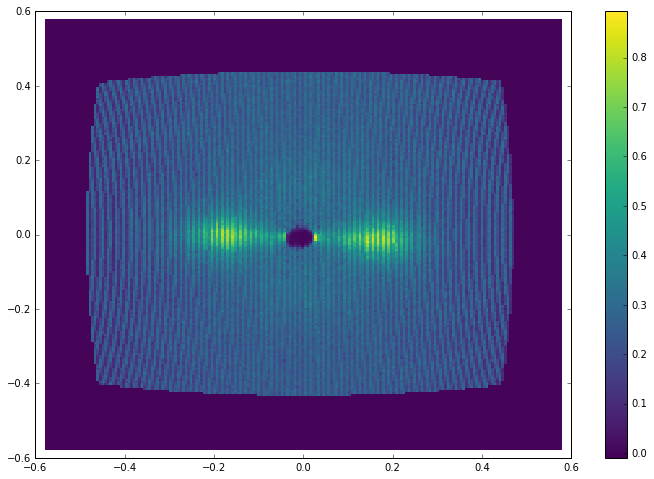

In [40]:
# Plot as color mesh
plt.pcolormesh(X, Y, Z)
plt.colorbar()
plt.show()

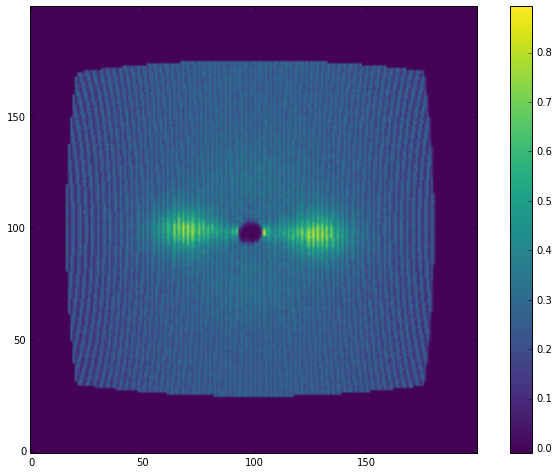

In [41]:
# Plot as imshow
plt.imshow(Z,origin='lower')
plt.colorbar()
plt.show()

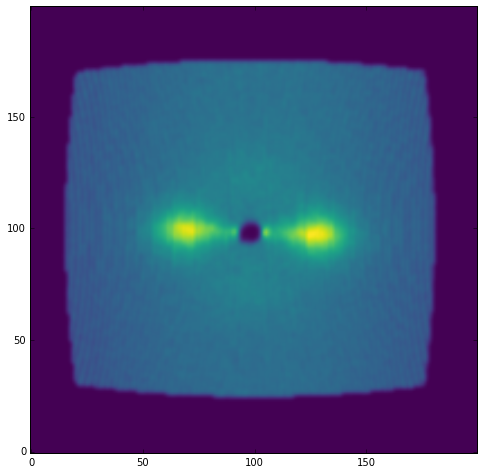

In [42]:
# Image smoothing to get rid of the stripes
from scipy.ndimage import filters
Z_smooth = filters.gaussian_filter(Z, sigma=1)
plt.imshow(Z_smooth,origin='lower')

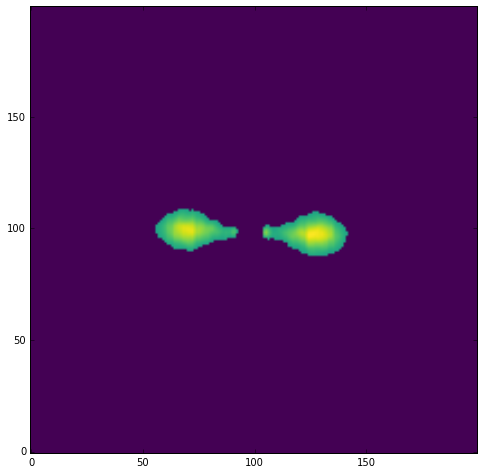

In [50]:
from scipy import ndimage

threshold = 0.4
#Set everything below the threshold to 0:
Z_thresh = np.copy(Z_smooth)
Z_thresh[Z_thresh<threshold] = 0
plt.imshow(Z_thresh,origin='lower')

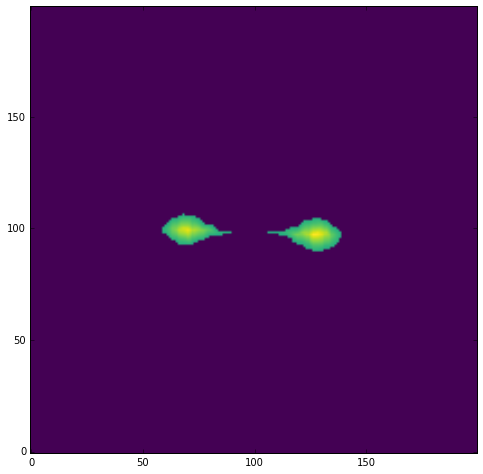

In [56]:
# Erode usefull only when more than 2 zones are found
# It erodes edges
Z_eroded = ndimage.morphology.grey_erosion(Z_thresh,size=(5,5))
plt.imshow(Z_eroded,origin='lower')

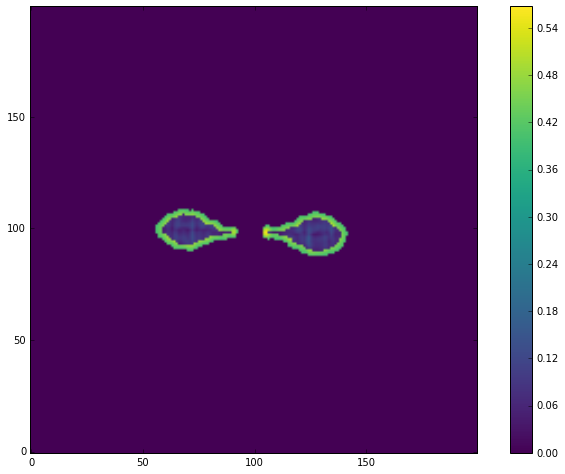

In [57]:
# The maxima for Z_eroded appears off, let's subtract
Z_tmp = Z_thresh - Z_eroded
plt.imshow(Z_tmp,origin='lower')
plt.colorbar()
# It looks OK!

In [83]:
#now find the objects
def find_centers_of_mass(image):
    labeled_image, number_of_objects = ndimage.label(image)
    centroids = ndimage.center_of_mass(Z_eroded, labeled_image,
                                         np.arange(1, number_of_objects + 1))
    centroids = [(j, i) for i, j in centroids]
    return centroids

centroids = find_centers_of_mass(Z_eroded)

assert len(centroids) == 2, "Error: Found more than 2 peaks!!"
    
pprint(centroids)

[(126.16353549497092, 96.980475627041713),
 (70.721779103685179, 99.052351892534134)]


Qx= 0.15 Qy=-0.01
Qx=-0.17 Qy=-0.00


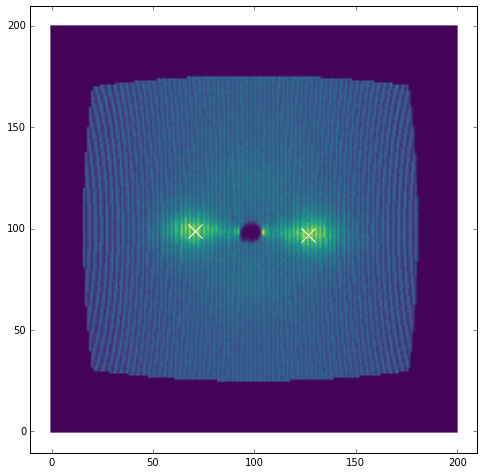

In [106]:
plt.imshow(Z,origin='lower')
X_unique = np.unique(X)
Y_unique = np.unique(Y)

centroids_in_q = np.empty_like(centroids)

# Mark the centroids with a cross
for idx,c in enumerate(centroids):
    plt.scatter(c[0],c[1],color='white',marker='x', s= 200)
    centroids_in_q[idx] = [X_unique[int(round(c[0]))],
                           Y_unique[int(round(c[1]))]]
    print("Qx={:5,.2f} Qy={:5,.2f}".format(centroids_in_q[idx][0],
                                           centroids_in_q[idx][1]))

In [119]:
# Get the average radius 
radius = np.sqrt(np.hypot(centroids_in_q[:,0],centroids_in_q[:,1]))
radius_average = np.average(radius)
radius_average

0.40024098953375176